In [1]:
# Install required libraries
!pip install nltk pandas matplotlib seaborn

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)

# Keep only necessary columns
df = df[['tweet', 'label']]

# Show the first 5 rows
df.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [5]:
# Map numeric labels to text labels
df['label'] = df['label'].map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Verify the mapping
df.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,Negative
1,@user @user thanks for #lyft credit i can't us...,Negative
2,bihday your majesty,Negative
3,#model i love u take with u all the time in ...,Negative
4,factsguide: society now #motivation,Negative


In [6]:
# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean tweets
def clean_text(text):
    text = re.sub(r"http\S+", "", text)       # remove URLs
    text = re.sub(r"@\w+", "", text)          # remove mentions
    text = re.sub(r"#\w+", "", text)          # remove hashtags
    text = text.lower()                       # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = text.split()                     # tokenize
    tokens = [word for word in tokens if word not in stop_words]      # remove stopwords
    return " ".join(tokens)

# Apply cleaning function to all tweets
df['clean_tweet'] = df['tweet'].apply(clean_text)

# Show a sample
df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,@user @user thanks for #lyft credit i can't us...,thanks credit cant use cause dont offer wheelc...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,love u take u time urð± ðððð ð¦...
4,factsguide: society now #motivation,factsguide society


In [7]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on compound score
def get_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['predicted_sentiment'] = df['clean_tweet'].apply(get_sentiment)

# Show a few predictions
df[['clean_tweet', 'predicted_sentiment']].head()

,clean_tweet,predicted_sentiment
0,father dysfunctional selfish drags kids dysfun...,Negative
1,thanks credit cant use cause dont offer wheelc...,Positive
2,bihday majesty,Neutral
3,love u take u time urð± ðððð ð¦...,Positive
4,factsguide society,Neutral


/tmp/ipython-input-8-2485580873.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='predicted_sentiment', palette='pastel')


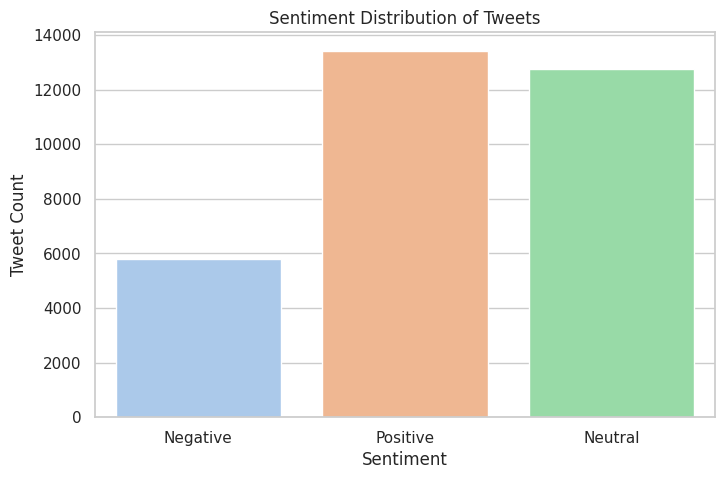

In [8]:
# Set plot style
sns.set(style='whitegrid')

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='predicted_sentiment', palette='pastel')
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

In [9]:
from sklearn.metrics import classification_report

# Print evaluation report
print(classification_report(df['label'], df['predicted_sentiment']))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Negative       0.85      0.17      0.28     29720
     Neutral       0.06      0.34      0.10      2242
    Positive       0.00      0.00      0.00         0

    accuracy                           0.18     31962
   macro avg       0.30      0.17      0.13     31962
weighted avg       0.80      0.18      0.26     31962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
